# Advanced Classification Predict

©  Explore Data Science Academy

---

### Honour Code

Team ES_2, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<img src="climate_change.jpg" width="800px">
    <figcaption><p text_align = "center">

### Climate Change
Climate is the average weather in a place over many years. Climate change is a shift in those average conditions.

The rapid climate change we are now seeing is caused by humans using oil, gas and coal for their homes, factories and transport.

When these fossil fuels burn, they release greenhouse gases - mostly carbon dioxide (CO2). These gases trap the Sun's heat and cause the planet's temperature to rise.

### Predict Overview: Climate Change Belief Analysis 2022
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received. Our company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of predicting tweets;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="gwwsjpgy1KtBxQNzAWYIZvNkn",
    project_name="climate-change-tweet-classification-predict",
    workspace="softmancho",
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/softmancho/climate-change-tweet-classification-predict/9a50e224bc7643f4bfaab553c6ae87b7



In [2]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd

# Libraries for data preparation 
import re
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns


# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

# Building classification models
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Libraries for assessing model accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score


from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

**2.1 Brief description of the data**

The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

**Class Description**

>2 News: the tweet links to factual news about climate change

>1 Pro: the tweet supports the belief of man-made climate change

>0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

>-1 Anti: the tweet does not believe in man-made climate change

**Variable definitions**

>sentiment: Sentiment of tweet

>message: Tweet body

>tweetid: Twitter unique id

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

Let's get the number of rows and columns of the train and test datasets,also lets have a preview of the first few rows of tha datasets.

In [4]:
print(train_df.shape)
print( test_df.shape)

display(train_df.head())
display(test_df.head())

(15819, 3)
(10546, 2)


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [5]:
# Looking for duplicates
percent_duplicates = round((1-(train_df['message'].nunique()/len(train_df['message'])))*100,2)
print('Duplicated tweets in train data:')
print(percent_duplicates,'%')

Duplicated tweets in train data:
10.05 %


In [6]:
# Check data types for all columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The dataset has 3 features namely sentiment, message, tweetid. The features have 15819 entries and they have no missing values. The message feature has an object datetype i.e. that the features has mixed data types(numbers and strings).  

In [7]:
# look at data statistics
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

### Pre-processing
Before we continue exploring our data we will have to do some preprocessing in order to gain maximum insights:

- Extract hashtags and store them in separate dataframes for each class
- Remove 'noisy entities' such as URL's, punctuations, mentions, numbers and extra white space.
-Contractions: Words like ain't, isn't, will have to be expanded to "am not" and "is not."
-Non-ascii Characters: We noticed non-ascii characters. They will also have to go.
-\n character: There are lots of \n characters. They will have to be removed.
-Emojis: There are lots of emojis. They will also have to be removed.
- Tokenization
- Perform part of speech tagging (POS) and lemmatization
- Specific named entity extraction

###### Create a copy

The first step in the preprocessing is to create a copy of the train dataframe for the EDA.

In [8]:
def update(df):
    
    df_copy=df.copy()
    
    word_sentiment=[]

    for i in  df_copy['sentiment'] :
        if i == 1 :
            word_sentiment.append('Pro')  
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')
            
    df_copy['sentiment']=word_sentiment
    
    return df_copy

df_sent = update(train_df)
df_sent.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


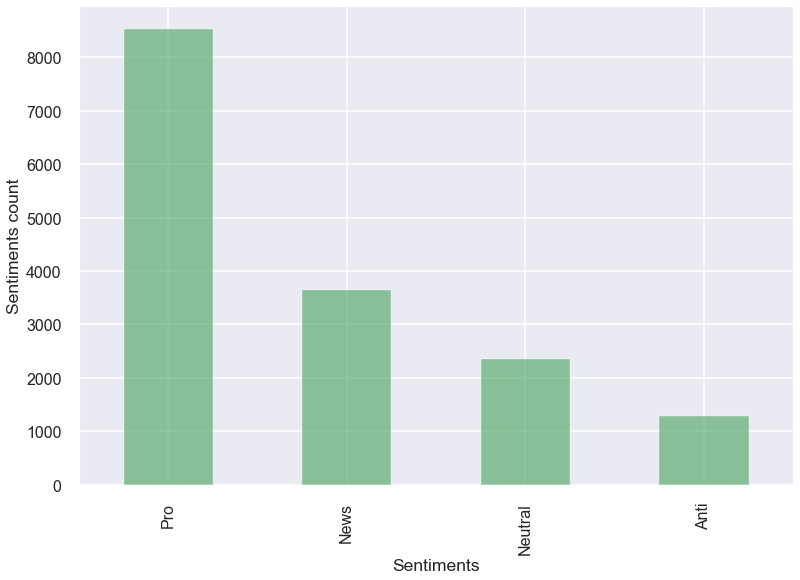

In [9]:
# Bar plot of label classes
fig,ax = plt.subplots()
df_sent['sentiment'].value_counts().plot(kind = 'bar', facecolor='g', alpha=0.65)
ax.set_xlabel('Sentiments')
ax.set_ylabel('Sentiments count')
plt.show()

### Hashtag extraction
Hashtags are extracted from the original tweets and stored in seperate dataframes for each class. This is done before tweet cleaning to ensure no information is lost.

In [10]:
def hashtag_extract(tweet):

    # Extract all hashtags from the message column of the dataframe,    
    hashtags = []
    for i in tweet.str.lower():
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    #add all extracted hashtags in a list called hashtags
    hashtags = sum(hashtags,[])

    #generate the frequency count for each hashtahe in the dataframe
    frequency = nltk.FreqDist(hashtags)

    #convert the generated frquency count dictionary of each hashtags back to a new dataframe
    hashtag_df = pd.DataFrame({ 'hashtags': list(frequency.keys()),
                               'counts': list(frequency.values())
                             })
    #select the first 20 largest frequency count of each hashtag
    hashtag_df = hashtag_df.nlargest(20, columns='counts')
    
    return hashtag_df

In [11]:
# Extracting the hashtags from tweets in each class
pro =     hashtag_extract( df_sent ['message'][df_sent ['sentiment'] == 'Pro']     )
anti =    hashtag_extract( df_sent ['message'][df_sent ['sentiment'] == 'Anti']    )
neutral = hashtag_extract( df_sent ['message'][df_sent ['sentiment'] == 'Neutral'] )
news =    hashtag_extract( df_sent ['message'][df_sent ['sentiment'] == 'News']    )

pro.head()

,hashtags,counts
19,climate,188
17,beforetheflood,148
45,climatechange,120
13,imvotingbecause,62
4,cop22,59


#### Tweet Cleaning
Remove 'noisy entities' such as URL's, punctuations, mentions, numbers and extra white space. The data is further normalized by converting all letters to lowercase.

In [12]:
def TweetCleaner(tweet):
    # Convert everything to lowercase
   
    # Remove mentions   
    tweet = re.sub('@[\w]*','',tweet) 
    
    # removing rt
    tweet= tweet.replace("rt", "")
    
    # removing \n
    tweet= tweet.replace("\n", "")
    
    #remove emogies
    tweet= tweet.encode("ascii", "ignore").decode("ascii")
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
     
    # Remove that funny diamond
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ') 
    
    # Remove punctuation
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    
    # convert all letters to lowercase
    tweet = tweet.lower() 
    
    return tweet

# Clean the tweets in the message column
train_df['message'] = train_df['message'].apply(TweetCleaner)

train_df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn t think carbon di...,625221
1,1,it s not like we lack evidence of anthropogeni...,126103
2,2,rt researchers say we have three years to ac...,698562
3,1,wired was a pivotal year in the war on clima...,573736
4,1,rt it s and a racist sexist climate chan...,466954


####  Lemmatization

In lemmatization, we reduce the word into dictionary root form. For instance "cats" is converted into "cat". Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different. Lemmatization is preferred over stemming since stemming is a crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required

In [64]:
def lemmatize(df):
    
    #function that converts list to string
    def list_to_string(words): return ' '.join(words) 
    
    # the function that carries out the work
    def tweet_lemma(words, lemmatizer): return [lemmatizer.lemmatize(word) for word in words]
    
    #tokenise each word from each row using word tokenize
    tokeniser = TreebankWordTokenizer()
    df['message']= df['message'].apply(tokeniser.tokenize)
    
    #Remove stop word from tweet text
    remove_all = stopwords.words('english')
    remove_all = remove_all.remove('not', 'nor', 'never') 
    df['message']= df['message'].apply(lambda words:[word for word in words if word not in set(stopwords.words('english')) ])
    
    # lemmatizing the tokens 
    wnl = WordNetLemmatizer()
    df['message']= df['message'].apply(tweet_lemma, args=(wnl, ))
    df['message'] =df['message'].apply(lambda x: list_to_string(x))


    return df

train_df = lemmatize(train_df)
train_df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief think carbon dioxide ma...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researcher say three year act climate chang...,698562
3,1,wired pivotal year war climate change,573736
4,1,rt racist sexist climate change denying bigot ...,466954


In [18]:
# Create new dataframe for word cloud
df_train_cloud = train_df.copy()
df_train_cloud.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief think carbon dioxide ma...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,researcher say three year act climate change late,698562
3,1,wired pivotal year war climate change,573736
4,1,racist sexist climate change denying bigot lea...,466954


The use of preprocessed data in Word Cloud makes it easy to identify the relevant words as opposed to many instances of https and other types of noise. 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.4 Put in Word Cloud Below

In [19]:
# Create new dataframe for word cloud
df_train_cloud = train_df.copy()
df_train_cloud.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief think carbon dioxide ma...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,researcher say three year act climate change late,698562
3,1,wired pivotal year war climate change,573736
4,1,racist sexist climate change denying bigot lea...,466954


(-0.5, 399.5, 199.5, -0.5)

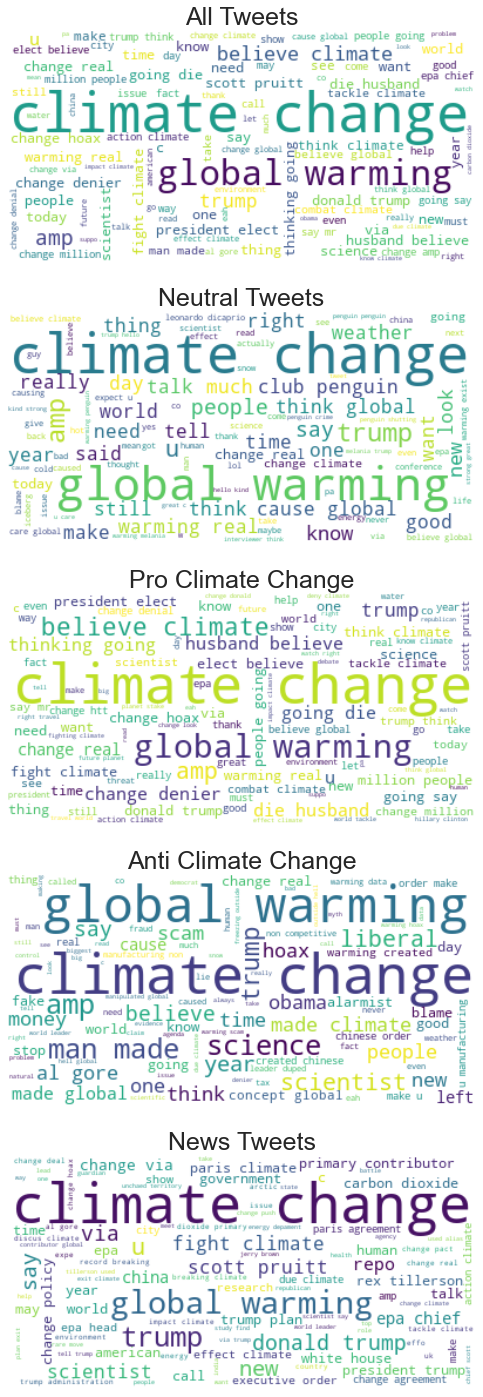

In [20]:
df_sent1 = df_train_cloud[df_train_cloud['sentiment']==1]
df_sent0 = df_train_cloud[df_train_cloud['sentiment']==0]
df_sentneg = df_train_cloud[df_train_cloud['sentiment']==-1]
df_sent2 = df_train_cloud[df_train_cloud['sentiment']==2]

tweet_All = " ".join(review for review in train_df.message)
tweet_sent0 = " ".join(review for review in df_sent0.message)
tweet_sent1 = " ".join(review for review in df_sent1.message)
tweet_sentneg = " ".join(review for review in df_sentneg.message)
tweet_sent2 = " ".join(review for review in df_sent2.message)

fig, ax = plt.subplots(5, 1, figsize  = (35,25))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_sent0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent0)
wordcloud_sent1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent1)
wordcloud_sentneg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sentneg)
wordcloud_sent2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=25)
ax[0].axis('off')
ax[1].imshow(wordcloud_sent0, interpolation='bilinear')
ax[1].set_title('Neutral Tweets',fontsize=25)
ax[1].axis('off')
ax[2].imshow(wordcloud_sent1, interpolation='bilinear')
ax[2].set_title('Pro Climate Change',fontsize=25)
ax[2].axis('off')
ax[3].imshow(wordcloud_sentneg, interpolation='bilinear')
ax[3].set_title('Anti Climate Change',fontsize=25)
ax[3].axis('off')
ax[4].imshow(wordcloud_sent2, interpolation='bilinear')
ax[4].set_title('News Tweets',fontsize=25)
ax[4].axis('off')

#wordcloud.to_file("img/first_review.png")

### Hashtags
Hashtags have long been an important tool on Twitter for helping users organize and sort their tweets. They're a great way to indicate that your content is relevant to a certain topic and to get your tweets in front of an interested audience.

Considering this, we decided it might be insightful to see what the most frequent hashtags in each class are. This will help us gain a better understanding of what kind of information is being consumed and shared in each class.

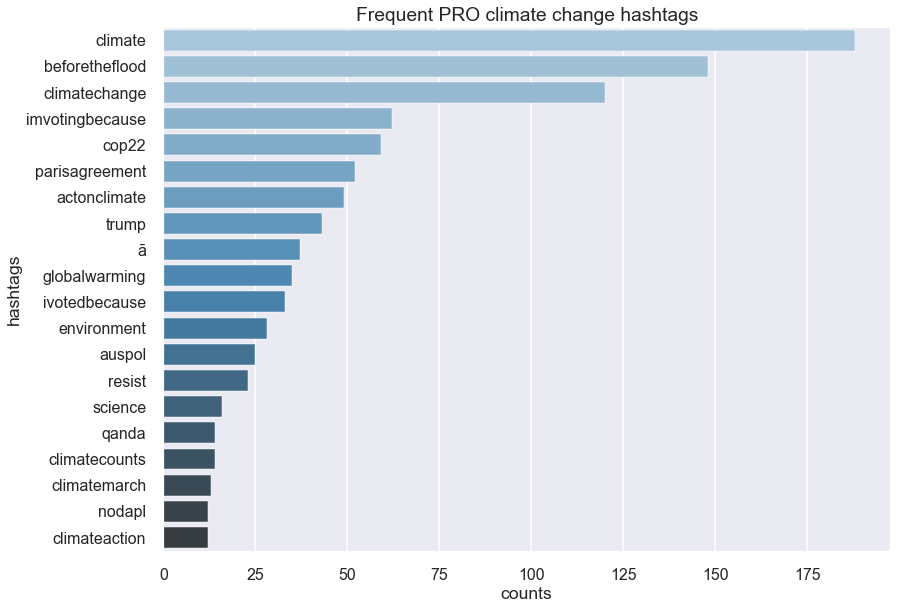

In [21]:
# Plot the frequent hastags for pro and anti climate change classes
sns.barplot(data=pro,y=pro['hashtags'], x=pro['counts'], palette=("Blues_d"))
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()

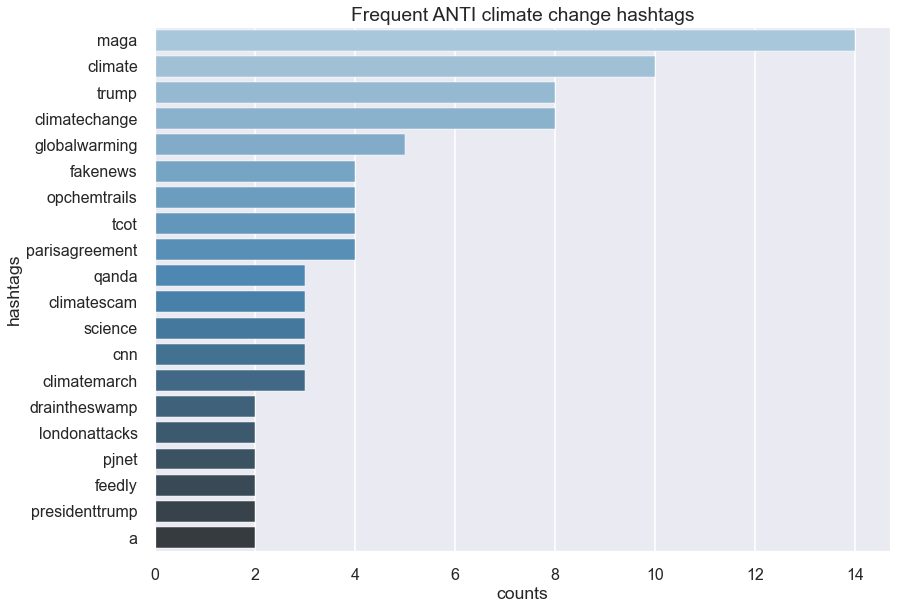

In [22]:
sns.barplot(data=anti,y=anti['hashtags'], x=anti['counts'], palette=("Blues_d"))
plt.title('Frequent ANTI climate change hashtags')
plt.tight_layout()

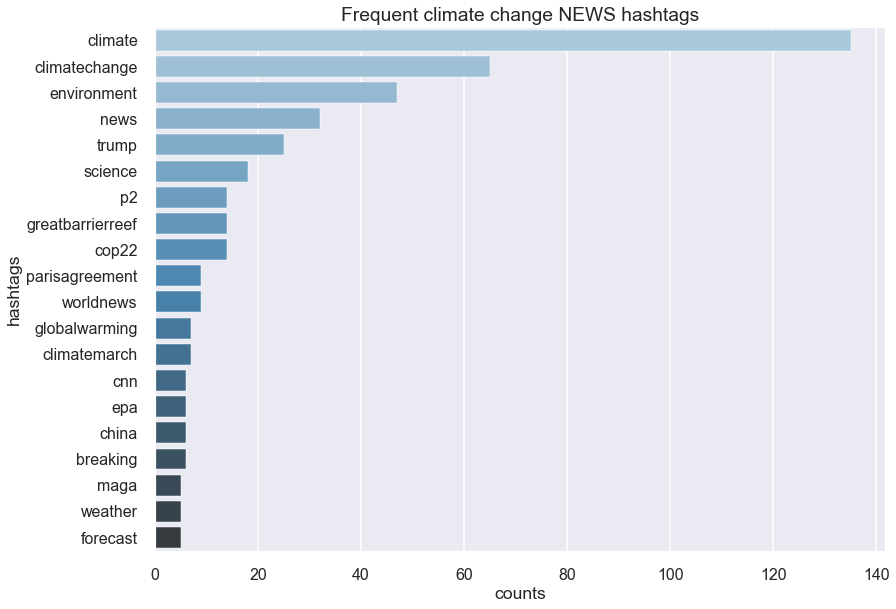

In [23]:
# Plot the frequent hastags for the news and neutral classes
sns.barplot(y=news['hashtags'], x=news['counts'], palette=("Blues_d"))
plt.title('Frequent climate change NEWS hashtags')
plt.tight_layout()

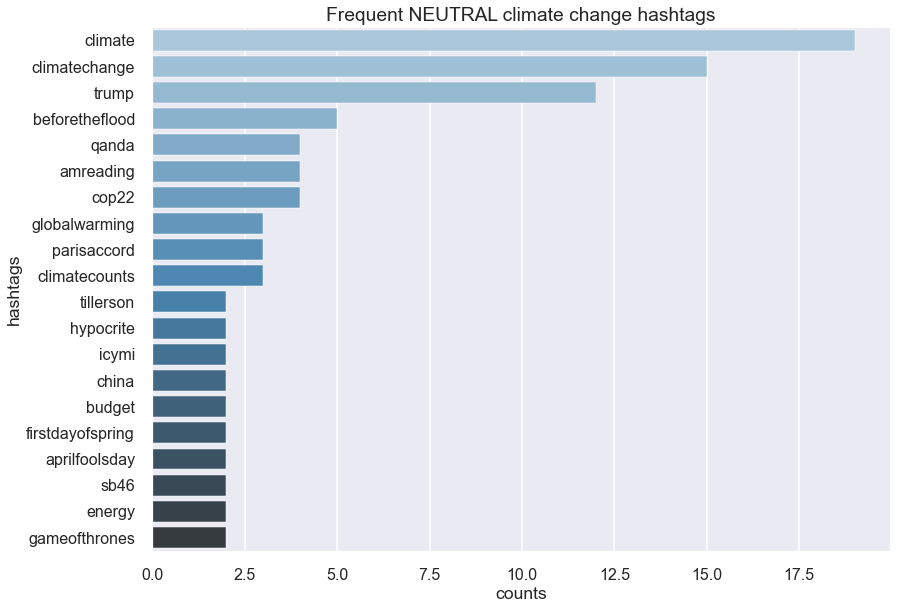

In [24]:
sns.barplot(y=neutral['hashtags'], x=neutral['counts'], palette=("Blues_d"))
plt.title('Frequent NEUTRAL climate change hashtags')
plt.tight_layout()

# 5. Modeling

## Building classification models

We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

The following 5 models will be considered:

- Random forest
- Naive Bayes
- K nearest neighbors
- Logistic regression
- Linear SVC

#### Train - Validation split

Before we pass our data through our custom pipelines we have to split our train data into features and target variables. After this step we can split our train data into a train and validation set. This will allow us to evaluate our model performance and chose the best model to use for our submission

In [25]:
# Split the dataset into train & validation (20%) for model training

# Seperate features and tagret variables
X = train_df['message']
y = train_df['sentiment']

# Split the train data to create validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#### Pipelines

Pipelines consist of 2 steps, vectorization and model fitting.

Machines, unlike humans, cannot understand the raw text. Machines can only see numbers. Particularly, statistical techniques such as machine learning can only deal with numbers. Therefore, we need to convert our text into numbers.

The TFIDF vectorizer assigns word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Another advantage of this method is that the resulting vectors are already scaled.

In [26]:
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5,n_estimators=100))
              ])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())
              ])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))
               ])

# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1,class_weight='balanced',max_iter=1000))
              ])
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))
                ])

#### Train the models

The models are trained by passing the train data through each custom pipeline. The trained models are then used to predict the classes for the validation data set.

In [27]:
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_valid)

# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)

# Linear regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_valid)

# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_valid)

COMET ERROR: Failed to extract parameters from estimator


## Model evaluation

The performance of each model will be evaluated based on the precision, accuracy and F1 score achieved when the model is used to predict the classes for the validation data. We will be looking at the following to determine and visualize these metrics:

Classification report
Confusion matrix
The best model will be selected based on the weighted F1 score.

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       278
           0       0.00      0.00      0.00       425
           1       0.55      1.00      0.71      1755
           2       0.00      0.00      0.00       706

    accuracy                           0.55      3164
   macro avg       0.14      0.25      0.18      3164
weighted avg       0.31      0.55      0.40      3164



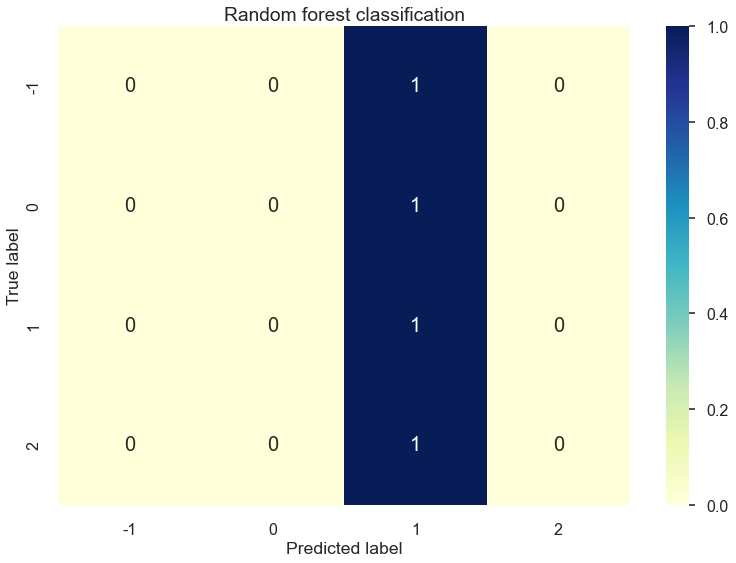

In [28]:
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_valid, y_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Random forest classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

          -1       0.75      0.01      0.02       278
           0       0.81      0.07      0.13       425
           1       0.63      0.97      0.76      1755
           2       0.85      0.48      0.62       706

    accuracy                           0.66      3164
   macro avg       0.76      0.38      0.38      3164
weighted avg       0.71      0.66      0.58      3164



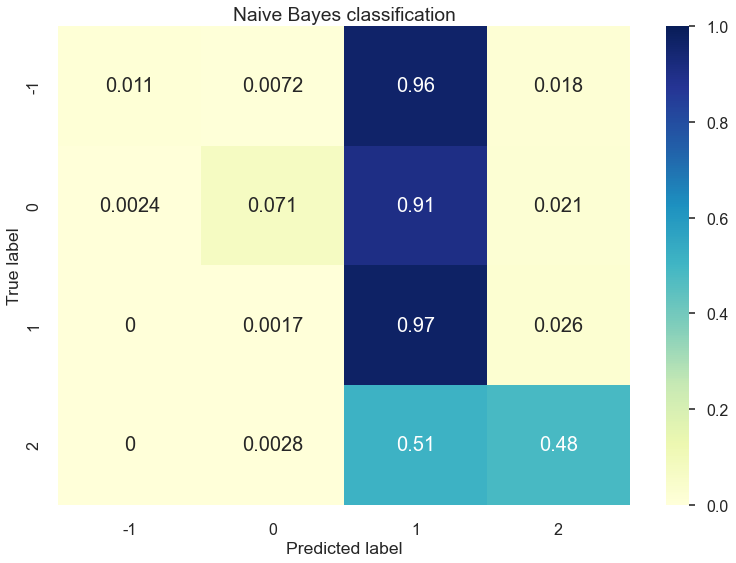

In [29]:
# Generate a classification Report for the Naive Bayes model
print(metrics.classification_report(y_valid, y_pred_nb))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_nb)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=nb.classes_, 
            yticklabels=nb.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Naive Bayes classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

          -1       0.63      0.12      0.19       278
           0       0.27      0.26      0.27       425
           1       0.68      0.53      0.59      1755
           2       0.34      0.64      0.44       706

    accuracy                           0.48      3164
   macro avg       0.48      0.39      0.37      3164
weighted avg       0.54      0.48      0.48      3164



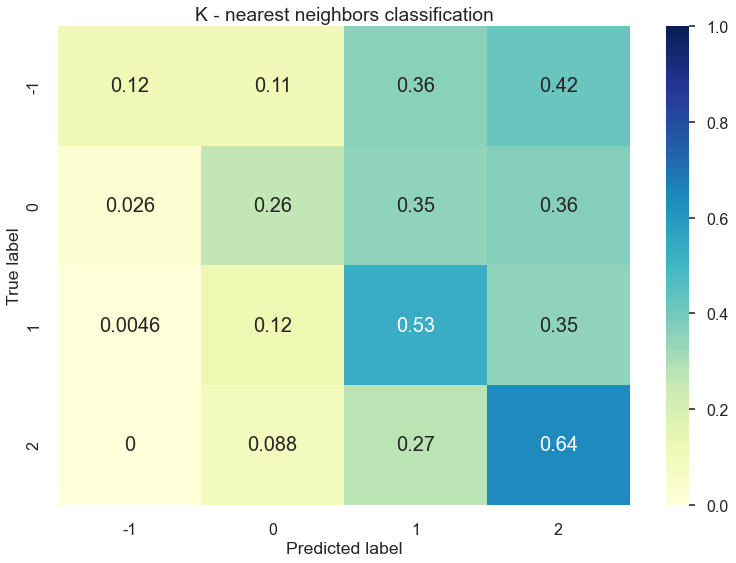

In [30]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_valid, y_pred_knn))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('K - nearest neighbors classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

          -1       0.49      0.62      0.55       278
           0       0.42      0.59      0.49       425
           1       0.84      0.66      0.74      1755
           2       0.65      0.79      0.71       706

    accuracy                           0.67      3164
   macro avg       0.60      0.66      0.62      3164
weighted avg       0.71      0.67      0.68      3164



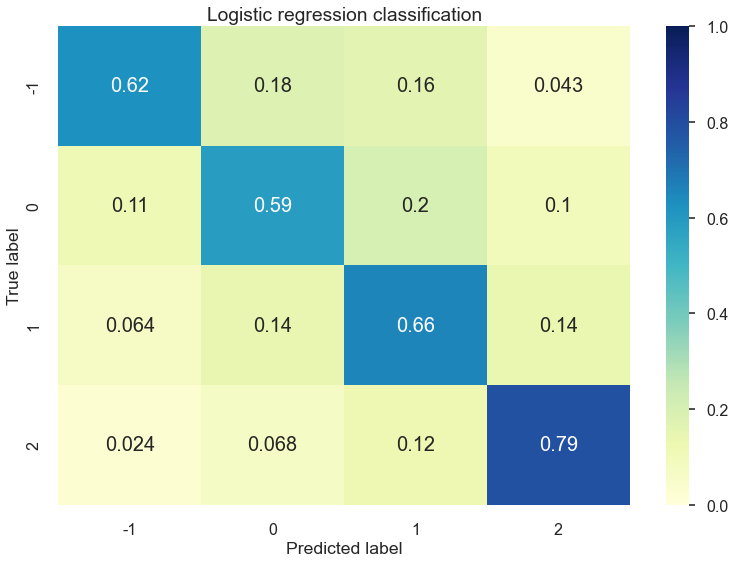

In [31]:
# Generate a classification Report for the model
print(metrics.classification_report(y_valid, y_pred_lr))

cm = confusion_matrix(y_valid, y_pred_lr)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lr.classes_, 
            yticklabels=lr.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

          -1       0.52      0.53      0.53       278
           0       0.47      0.49      0.48       425
           1       0.79      0.75      0.77      1755
           2       0.68      0.74      0.71       706

    accuracy                           0.70      3164
   macro avg       0.62      0.63      0.62      3164
weighted avg       0.70      0.70      0.70      3164



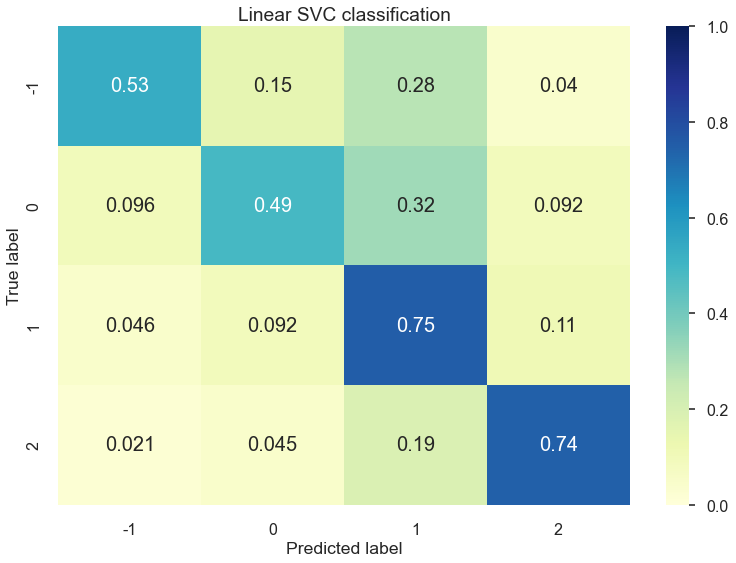

In [32]:
# Generate a classification Report for the linear SVC model
print(metrics.classification_report(y_valid, y_pred_lsvc))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_lsvc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lsvc.classes_, 
            yticklabels=lsvc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':20})

# Adding headings and lables
plt.title('Linear SVC classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Model Selection

Linear SVC has achieved the highest F1 score of 0.70 and is therefore our model of choice moving forward.

#### Hyperparameter tuning

Once our top performing model has been selected, we attempt to improve it by performing some hyperparameter tuning.

After the optimal parameters are determined the linear SVC model is retrained using these parameters, resulting in a 2% increase in the F1 score.

In [33]:
# Retrain linear SVC using optimal hyperparameters:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8, min_df=2,ngram_range=(1,2))),
                    
                  ('clf', LinearSVC(C=0.3,class_weight='balanced',max_iter=3000))])

# Fit and predict
lsvc_op.fit(X_train, y_train)
y_pred = lsvc_op.predict(X_valid)

print('F1 score improved by',
      round(100*((metrics.accuracy_score(y_pred, y_valid) - metrics.accuracy_score(y_pred_lsvc, y_valid)) 
                 /metrics.accuracy_score(y_pred_lsvc, y_valid)),0), '%')

F1 score improved by 2.0 %


## End Comet experiment

In [34]:
# Saving each metric to add to a dictionary for logging
f1 = f1_score(y_valid, y_pred, average='weighted')
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')

# Create dictionaries for the data we want to log          
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}

params= {'classifier': 'linear SVC',
         'max_df': 0.8,
         'min_df': 2,
         'ngram_range': '(1,2)',
         'vectorizer': 'Tfidf',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# Log image
experiment.log_image(metrics)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()

COMET ERROR: invalid image file_type: <class 'dict'>
COMET ERROR: Could not convert image_data into an image; ignored
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/softmancho/climate-change-tweet-classification-predict/8e6fdd499732469b939ffa44a2f99cdd
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.7124958319287019
COMET INFO:     precision : 0.7155834697622284
COMET INFO:     recall    : 0.7104930467762326
COMET INFO:   Parameters:
COMET INFO:     C                             : 0.3
COMET INFO:     algorithm                     : auto
COMET INFO:     alpha                         : 1.0
COMET INFO:     bootstrap                     : True
COMET INFO:     ccp_alpha                     : 0.0
COMET INFO:     class_prior                   : 1
COMET INFO:     class_weight                  : b

COMET INFO:     tfidf__min_df                 : 2
COMET INFO:     tfidf__ngram_range            : (1, 2)
COMET INFO:     tfidf__norm                   : l2
COMET INFO:     tfidf__preprocessor           : 1
COMET INFO:     tfidf__smooth_idf             : True
COMET INFO:     tfidf__stop_words             : 1
COMET INFO:     tfidf__strip_accents          : 1
COMET INFO:     tfidf__sublinear_tf           : False
COMET INFO:     tfidf__token_pattern          : (?u)\b\w\w+\b
COMET INFO:     tfidf__tokenizer              : 1
COMET INFO:     tfidf__use_idf                : True
COMET INFO:     tfidf__vocabulary             : 1
COMET INFO:     tfidf_analyzer                : word
COMET INFO:     tfidf_binary                  : False
COMET INFO:     tfidf_decode_error            : strict
COMET INFO:     tfidf_dtype                   : <class 'numpy.float64'>
COMET INFO:     tfidf_encoding                : utf-8
COMET INFO:     tfidf_input                   : content
COMET INFO:     tfidf_lowerc

### Cleaning  Test_data

In [35]:
test_df ['message'] = test_df ['message'].apply(TweetCleaner)
test_df = lemmatize(test_df)
test_df.head()

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffer climate change woman r...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump believe climate change th...,476263
4,rt female orgasm cause global warming sarcasti...,872928


### generate the csv file to submmit to kaggle

In [36]:
def gen_kaggle_csv(model, df):
    
    #load the test data to a varable "X_unseen"
    X_test = df['message']
    
    #Make a prediction on the test data with the trained model
    mypreds = model.predict(X_test)
    
    #Reset the index of the test data
    df.reset_index(inplace=True)
    
    #Make a copy of the tweet id 
    tweetid = df['tweetid']
    
    #Convert the tweet_id and the prediction 
    kaggle = pd.DataFrame({'tweetid' : tweetid, 
                                  'sentiment': mypreds})
    
    #convert file to csv
    kaggle.to_csv('kaggle.csv', index=False)

    return kaggle
gen_kaggle_csv(lsvc, test_df)

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,0
10542,875167,1
10543,78329,1
10544,867455,0


### Pickle Trained Model

In [37]:
def save_pickle_file(model, file_name):
    # import the pickle module
    import pickle
    
    #asign a path to the file_name 
    model_save_path = file_name 
    
    #save file to thespecified path
    with open(model_save_path,'wb') as file: 
        pickle.dump(model,file)
    
    return  model_save_path

save_pickle_file(lsvc, "lsvc_model.pkl")

'lsvc_model.pkl'

# References

These references represent the documents we consulted that helped us in our work. 

### Data Cleaning
1. Nlp for beginners - sentiment analysis of twitter data using sklearn in python: https://www.youtube.com/watch?v=qzBtplRo91o#
2. Sentiment analysis using sklearn python in IMDB dataset: https://www.youtube.com/watch?v=glHWiQRgLn4
3. Complete eda on text data in python: https://www.youtube.com/watch?v=HVBk2Ge_Q98
4. Text data cleaning of tweets analysis: https://www.kaggle.com/code/ragnisah/text-data-cleaning-tweets-analysis/notebook


### Feature Engineering
1. Vectorization techniques: https://neptune.ai/blog/vectorization-techniques-in-nlp-guide
2. How to use TFDIF vectorizer: https://www.projectpro.io/recipes/use-tf-df-vectorizer
